In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
half_lives = np.random.uniform(low=10e-3, high=10e2, size = 10000).tolist()
rows = []
for half_life in half_lives:
  rows.append([0.5**(t/half_life) for t in range(100)])
data = pd.DataFrame(rows)
data['half_life'] = half_lives
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,half_life
0,1.0,0.993598,0.987237,0.980917,0.974637,0.968397,0.962197,0.956037,0.949917,0.943835,...,0.557409,0.553840,0.550294,0.546772,0.543271,0.539793,0.536337,0.532904,0.529492,107.923163
1,1.0,0.997668,0.995341,0.993020,0.990704,0.988394,0.986089,0.983789,0.981495,0.979206,...,0.808589,0.806703,0.804822,0.802945,0.801072,0.799204,0.797341,0.795481,0.793626,296.879376
2,1.0,0.998818,0.997637,0.996457,0.995279,0.994102,0.992927,0.991753,0.990580,0.989409,...,0.897934,0.896873,0.895812,0.894753,0.893695,0.892639,0.891583,0.890529,0.889476,585.895115
3,1.0,0.999190,0.998380,0.997572,0.996763,0.995956,0.995149,0.994343,0.993537,0.992732,...,0.928902,0.928150,0.927398,0.926647,0.925896,0.925146,0.924396,0.923647,0.922899,855.254268
4,1.0,0.998227,0.996456,0.994689,0.992925,0.991164,0.989406,0.987652,0.985900,0.984151,...,0.850841,0.849332,0.847826,0.846322,0.844821,0.843323,0.841828,0.840335,0.838844,390.493952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.999210,0.998420,0.997631,0.996843,0.996055,0.995268,0.994482,0.993696,0.992911,...,0.930591,0.929855,0.929121,0.928387,0.927653,0.926920,0.926187,0.925456,0.924724,876.845434
9996,1.0,0.997914,0.995833,0.993756,0.991683,0.989615,0.987551,0.985491,0.983435,0.981384,...,0.826959,0.825234,0.823513,0.821795,0.820081,0.818371,0.816664,0.814960,0.813261,331.980413
9997,1.0,0.998586,0.997174,0.995764,0.994356,0.992950,0.991546,0.990144,0.988744,0.987346,...,0.879183,0.877940,0.876698,0.875459,0.874221,0.872985,0.871750,0.870518,0.869287,489.866323
9998,1.0,0.994012,0.988060,0.982144,0.976263,0.970418,0.964607,0.958831,0.953090,0.947383,...,0.578961,0.575494,0.572049,0.568623,0.565219,0.561834,0.558470,0.555126,0.551802,115.414609


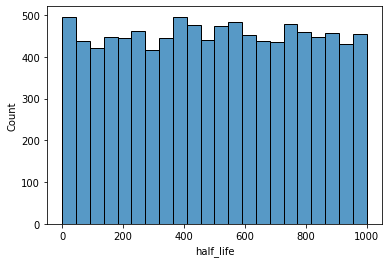

In [ ]:
sns.histplot(data=data, x='half_life')

(0.0, 100.0)

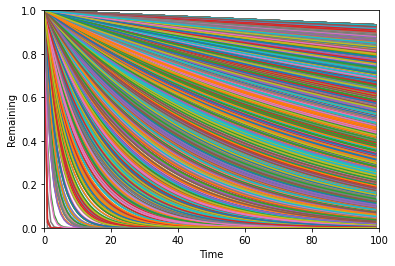

In [ ]:
x = np.arange(100)
y = data.drop(columns=['half_life'])
for index, row in y.iterrows():
  plt.plot(x, row)
plt.ylabel('Remaining')
plt.xlabel('Time')
plt.ylim(0, 1)
plt.xlim(0, 100)

In [ ]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
msk2 = np.random.rand(len(test)) < 0.8
validate = test[~msk2]
test = test[msk2]
train.to_csv('/content/drive/MyDrive/Project_MTL/data/SyntheticData/train.csv')
test.to_csv('/content/drive/MyDrive/Project_MTL/data/SyntheticData/test.csv')
validate.to_csv('/content/drive/MyDrive/Project_MTL/data/SyntheticData/validate.csv')